Expected diagram encodes the topology of a random process as a deterministice measure.

Overview:

* Consider a cloud of points $X$ with $n$ points, split $(1-p)n$ poits $X_{\text{true}}$ on a nice shape $M$, and $pn$, called $X_{\text{out}}$, are the outliers.

* Computing the persistence diagram won't reflect the true topology $M$, thus, we sample some points and averaging.

In [1]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

In [2]:
# No. points
n = 10000
# Percentage of outliers
p = 0.01

# No. points
n_true = int((1-p) * n)
n_outliers = n - n_true

In [3]:
def sample_torus(no_samples, r1, r2):
    theta1 = 2 * np.pi*np.random.rand(no_samples)
    theta2 = 2 * np.pi*np.random.rand(no_samples)
    
    x = (r1 + r2 * np.cos(theta2)) * np.cos(theta1)
    y = (r1 + r2 * np.cos(theta2)) * np.sin(theta1)
    z = r2 * np.sin(theta2)
    
    return np.array([x,y,z]).T

In [4]:
def sample_noise(no_samples, no_dim, scale):
    return scale * np.random.randn(no_samples, no_dim)

In [5]:
X_true = sample_torus(n_true, 4, 1)

In [6]:
X_noise = sample_noise(n_outliers, no_dim = X_true.shape[1], scale = np.std(X_true))

In [7]:
X = np.concatenate([X_true, X_noise])

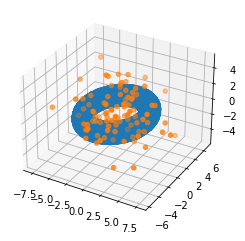

In [8]:
# Plot torus
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_true[:,0], X_true[:,1], X_true[:,2], 'xb')
ax.scatter(X_noise[:,0], X_noise[:,1], X_noise[:,2], 'or')
plt.show()

In [9]:
complex_tot = gd.RipsComplex(points = X).create_simplex_tree(max_dimension=1)
complex_true = gd.RipsComplex(points = X).create_simplex_tree(max_dimension=1)

persistence_tot = complex_tot.persistence()
persistence_true = complex_true.persistence()

In [14]:
h0_tot = complex_tot.persistence_intervals_in_dimension(0)
h0_true = complex_true.persistence_intervals_in_dimension(0)

In [15]:
no_samples = 100
no_experiments = 10

In [ ]:
samples = [np.random.choice(n, no_samples, )]